# Does 'review_scores_cleanliness' impact the price?

#### Busniess understanding: 
The objective of this programing is to find relation between price and cleaning reviews.

#### Data Understanding: 
Lisiting data set has 3000+ listing details with 92 columns of data. Lets explore the relation between relation between price and cleaning reviews

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Prepare Data: 
Lets modify Some of the field to more usable inorder to calculate. Price field was converted from object to float to perform basic operation by removing $ symbol. 

Filled the NaN values of price and cleaning rate with respective mean values.


In [2]:
df['price']=df['price'].replace('[\$,]', '', regex=True).astype(float)

In [3]:
df['price'] = df['price'].fillna(value=df['price'].mean())

In [29]:
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(value=df['review_scores_cleanliness'].mean())


In [7]:
df['price'] .isnull().value_counts()

False    3818
Name: price, dtype: int64

In [11]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(value=df['review_scores_rating'].mean())


#### Analysis
Group the scoring values by 10 bins to understand the rating. Listing price has no dependency on cleaning review.


In [16]:
df['review_bin'] = pd.cut(df['review_scores_cleanliness'], bins=10)
df.groupby('review_bin')['review_scores_rating'].mean()

review_bin
(2.993, 3.7]    40.000000
(3.7, 4.4]      52.500000
(4.4, 5.1]      70.800000
(5.1, 5.8]            NaN
(5.8, 6.5]      73.500000
(6.5, 7.2]      80.400000
(7.2, 7.9]            NaN
(7.9, 8.6]      86.777174
(8.6, 9.3]      92.327027
(9.3, 10.0]     96.672837
Name: review_scores_rating, dtype: float64

Analyzied the different reivew score for better understanding using heat map

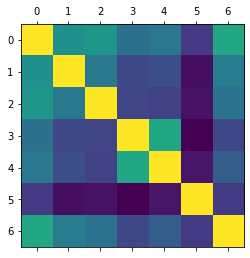

In [22]:
df1=df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
df1=df1.dropna()
plt.matshow(df1.corr())
plt.show()

#### Result: Below graph cleary shows that review score for cleanliness doesn't impact the price.

<AxesSubplot:xlabel='review_scores_cleanliness'>

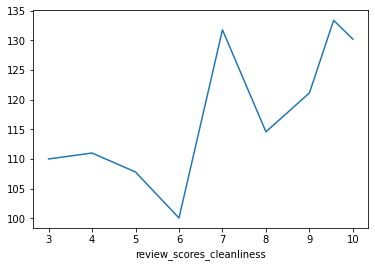

In [40]:
df.groupby(df.review_scores_cleanliness)['price'].mean().plot()